In [84]:
%matplotlib inline

import os 
import librosa
import importlib
import matplotlib
import numpy as np
import string as strp
import pr_util as util
import matplotlib.pyplot as plt
import generate_global_features_2 as ggf

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn import svm, neighbors
from sklearn.naive_bayes import GaussianNB

importlib.reload(util)
importlib.reload(ggf)

<module 'generate_global_features_2' from '/Users/felipefelix/USP/tcc/code/generate_global_features_2.py'>

In [76]:
num_species      = 3
n_min_per_specie = 10

n_global = 4 # number of global functions
scoring  = 'f1_weighted'
song_or_call = 'song'

data_dirs = util.choose_species(num_species)
data_dirs = util.check_num_files(data_dirs, song_or_call, num_species, n_min_per_specie)
print(data_dirs)

#data_dirs = ['/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-1/Batara cinerea/', 
#             '/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-1/Camptostoma obsoletum/', 
#             '/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-3/Myiodynastes maculatus/']

/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-4/Scytalopus iraiensis/ n files:12
/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-4/Streptoprocne biscutata/ n files:6
/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-3/Phylloscartes kronei/ n files:1
/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-3/Philydor atricapillus/ n files:12
/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-2/Hypoedaleus guttatus/ n files:30
/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-4/Scytalopus iraiensis/ n files:12
['/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-3/Philydor atricapillus/', '/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-2/Hypoedaleus guttatus/', '/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-4/Scytalopus iraiensis/']


In [77]:
print(util.FEATURES)
feat = util.FEATURES[3]
labels_dict_gt, labels_gt, data_gt = ggf.generate_global_features(n_global, feat, data_dirs, song_or_call, util.GLOBAL_FUNCTIONS, version = None)
labels_dict, labels, data = ggf.generate_global_features(n_global, feat, data_dirs, song_or_call, util.GLOBAL_FUNCTIONS, version = 'filtered1')

['rmse', 'mfcc', 'spec_band', 'spec_cent', 'spec_roll']
1000.mp3.spec_cent.txt
10010.mp3.spec_cent.txt
10011.mp3.spec_cent.txt
10014.mp3.spec_cent.txt
10016.mp3.spec_cent.txt
10017.mp3.spec_cent.txt
1003.mp3.spec_cent.txt
1004.mp3.spec_cent.txt
1006.mp3.spec_cent.txt
1008.mp3.spec_cent.txt
1009.mp3.spec_cent.txt
Bufffronted_FG_calls_Zizo-3-29.mp3.spec_cent.txt
0070.mp3.spec_cent.txt
1000528.mp3.spec_cent.txt
1000529.mp3.spec_cent.txt
1000530.mp3.spec_cent.txt
1000533.mp3.spec_cent.txt
1000534.mp3.spec_cent.txt
1000535.mp3.spec_cent.txt
1000537.mp3.spec_cent.txt
1000539.mp3.spec_cent.txt
1000540.mp3.spec_cent.txt
1000541.mp3.spec_cent.txt
1000542.mp3.spec_cent.txt
1000543.mp3.spec_cent.txt
1000545.mp3.spec_cent.txt
1000549.mp3.spec_cent.txt
1000550.mp3.spec_cent.txt
1000551.mp3.spec_cent.txt
1000554.mp3.spec_cent.txt
1000555.mp3.spec_cent.txt
1000557.mp3.spec_cent.txt
1000558.mp3.spec_cent.txt
HI-0202-Spot-backed-Antshrike.mp3.spec_cent.txt
Hypodaleusguttatussong.mp3.spec_cent.txt
Hypoe

In [78]:
print(labels_dict)
print(labels_dict_gt)
print(labels)
print(labels_gt)
print(len(labels))
print(len(labels_gt))
print(data[:10])
print(data_gt[:10])
print(len(data))
print(len(data_gt))

{'Hypoedaleus Guttatus': 1, 'Scytalopus Iraiensis': 2, 'Philydor Atricapillus': 0}
{'Hypoedaleus Guttatus': 1, 'Scytalopus Iraiensis': 2, 'Philydor Atricapillus': 0}
[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2]
54
54
[[  2795.88176966    293.14681456   4862.80360326   2219.22816606]
 [  3138.18585419    604.22366759   5012.18548912      0.        ]
 [  3180.24532603    431.18770177   5283.96834089      0.        ]
 [  4392.4483747     805.4253606    5348.07959483      0.        ]
 [  3695.62894486    505.35325145   5001.64046698      0.        ]
 [  2711.04033067    482.01292299   5223.30239936      0.        ]
 [  1085.3414474    1103.80911525   4172.2652273      34.87260869]
 [   719.36588327    933.14173277   3802.94207998     36.92285494]
 [   193.2136196     204.87622468   2390.91651587      0.        ]
 [ 

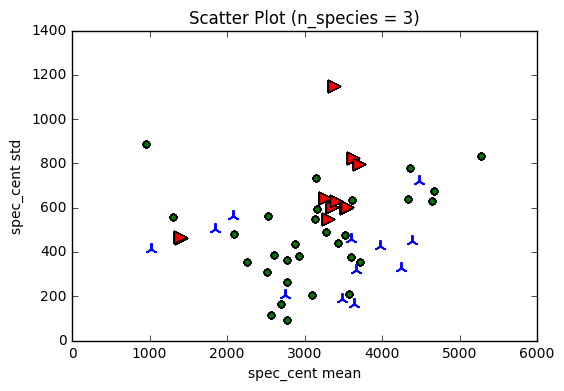

In [79]:
util.plot_scatter(data_gt[:,0], data_gt[:,1], labels, feat + ' mean', feat + ' std')

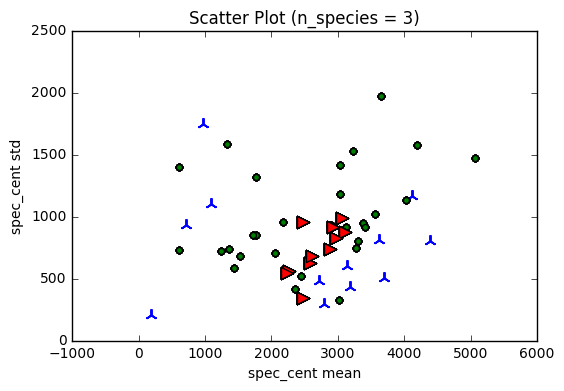

In [80]:
util.plot_scatter(data[:,0], data[:,1], labels, feat + ' mean', feat + ' std')

In [81]:
clf     = neighbors.KNeighborsClassifier(3, weights = 'uniform')
scores  = cross_val_score(clf, data_gt, labels_gt, n_jobs = -1, cv = 5, scoring=scoring)
result  = '{0:.2f} (+/- {1:.2f})'.format(scores.mean(), scores.std() * 2)
print('kNN - {0}: {1:.2f} (+/- {2:.2f})'.format(scoring, scores.mean(), scores.std() * 2))
print(scores)

clf     = neighbors.KNeighborsClassifier(3, weights = 'uniform')
scores  = cross_val_score(clf, data, labels, n_jobs = -1, cv = 5, scoring=scoring)
result  = '{0:.2f} (+/- {1:.2f})'.format(scores.mean(), scores.std() * 2)
print('Filtered - kNN - {0}: {1:.2f} (+/- {2:.2f})'.format(scoring, scores.mean(), scores.std() * 2))
print(scores)

/Users/felipefelix/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/felipefelix/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


kNN - f1_weighted: 0.53 (+/- 0.31)
[ 0.37019231  0.75113636  0.59636364  0.59333333  0.34      ]


/Users/felipefelix/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Filtered - kNN - f1_weighted: 0.51 (+/- 0.39)
[ 0.52380952  0.65714286  0.16        0.71428571  0.5030303 ]


In [82]:
gnb    = GaussianNB()
scores = cross_val_score(gnb, data_gt, labels_gt, n_jobs = -1, cv = 5, scoring=scoring)
result = '{0:.2f} (+/- {1:.2f})'.format(scores.mean(), scores.std() * 2)
print('GaussianNB - {0} : {1:.2f} (+/- {2:.2f})'.format(scoring,scores.mean(), scores.std() * 2))
print(scores)

gnb    = GaussianNB()
scores = cross_val_score(gnb, data, labels, n_jobs = -1, cv = 5, scoring=scoring)
result = '{0:.2f} (+/- {1:.2f})'.format(scores.mean(), scores.std() * 2)
print('Filtered - GaussianNB - {0} : {1:.2f} (+/- {2:.2f})'.format(scoring,scores.mean(), scores.std() * 2))
print(scores)

/Users/felipefelix/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/felipefelix/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/felipefelix/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/felipefelix/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


GaussianNB - f1_weighted : 0.32 (+/- 0.27)
[ 0.33333333  0.25        0.10909091  0.5025641   0.4       ]


/Users/felipefelix/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/felipefelix/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Filtered - GaussianNB - f1_weighted : 0.55 (+/- 0.38)
[ 0.35714286  0.56666667  0.32727273  0.71428571  0.8       ]


In [83]:
clf = svm.SVC(kernel = 'linear', C = 1, decision_function_shape='ovr')
scores = cross_val_score(clf, data_gt, labels_gt, n_jobs = -1, cv = 5, scoring=scoring)
print(scores)
print('SVM - {0} {1:.2f} (+/- {2:.2f})'.format(scoring, scores.mean(), scores.std() * 2))

clf = svm.SVC(kernel = 'linear', C = 1, decision_function_shape='ovr')
scores = cross_val_score(clf, data, labels, n_jobs = -1, cv = 5, scoring=scoring)
print(scores)
print('Filtered - SVM - {0} {1:.2f} (+/- {2:.2f})'.format(scoring, scores.mean(), scores.std() * 2))

/Users/felipefelix/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/felipefelix/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[ 0.43522727  0.4125      0.34285714  0.61428571  0.52857143]
SVM - f1_weighted 0.47 (+/- 0.19)


/Users/felipefelix/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[ 0.26666667  0.65714286  0.66153846  0.66        0.54153846]
Filtered - SVM - f1_weighted 0.56 (+/- 0.30)
